In [ ]:
from google.colab import files
uploaded = files.upload()

Saving im0081.ah.jpg to im0081.ah.jpg
Saving ex_template.jpg to ex_template.jpg
Saving xray.jpeg to xray.jpeg
Saving cafe.jpg to cafe.jpg
Saving gato_ponido.jpg to gato_ponido.jpg
Saving im0002.tif to im0002.tif
Saving keyb.tif to keyb.tif
Saving cameraman.tif to cameraman.tif


In [2]:
import os
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
from ipywidgets import interact, interactive, fixed, interact_manual

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
os.chdir("/content/drive/My Drive/Intro_procesamiento_de_imagenes/Data")

In [ ]:
########################################
# Imagenes son señales , ya que las señales captan una representación física de algun fenomeno
# En imagenes -> Representamos la iluminacion de una escena de una foto/objeto y captamos la luz (fenomeno fisico)
# Al ser la imagen una señal se le puede aplicar filtros
#######################################

In [ ]:
# Convolucion : es una operacion matematica que nosotros realizamos entre funciones
# Convolucion 1D: es desplazar una funcion sobre otra, se da solo en la interseccion de dominios, ya que ambas funciones 
# estan definidas ahi
# Convolucion 1D : puede ser una funcion continua(dominio es continuo)

In [ ]:
########################################
# Convolucion 1D : es discreta cuando se genera a partir de la multiplicacion de un sumando
#######################################

In [ ]:
#####################################
# Convolucion en 2D : Debe tenerse 2 funciones en 2D, convolucion en 2D de funciones discretas
# Imagenes son señales que son representadas por funciones discretas
#####################################

In [ ]:
# Revisar espectro de Fourier para imagenes (fourier representa la frecuencia , veces que se repiten los valores)
# Filtros se encargan de mostrar detalles o ocultar detalles
# La aplicacion de los filtros dependen de la aplicacion

In [ ]:
# A)Filtros lineales: se hacen combinaciones lineales entre los pixeles de la imagen y los valores del kernel
# 1.Suavizado:suavizan la imagen(eliminan caracteristicas).Por ejemplo al reconocer un rostro es mas importante saber
# los contornos de ojos,boca,nariz
# 2.Diferencia: filtros detectan variaciones entre los pixeles, estas variaciones se encargan de detectar contornos
# B)Filtros no lineales: mediana,maximo,minimo, desviacion estandar,etc

# Filtro lineal - Suavizado

## 0. Ruido de sal y pimienta

In [5]:
# Manchas blancas y negras en imagenes captadas en camaras antiguas
def SalAndPimienta(image,prob):
  output = np.zeros(image.shape,np.uint8) # imagen temporal
  thres = 1 - prob 
  for i in range(image.shape[0]):
      for j in range(image.shape[1]):
          rdn = random.random()
          if rdn < prob:
              output[i][j] = 0
          elif rdn > thres:
              output[i][j] = 255
          else:
              output[i][j] = image[i][j]
  return output

In [ ]:
!ls

 cafe.jpg		        gato_ponido.jpg  'Tarea 1.jpg'
 cameraman.tif		        im0002.tif	 'Tarea 2.JPG'
 Data_para_dibujar-RCP45.xlsx   im0081.ah.jpg	 'Tarea 3.JPG'
 Data_para_dibujar-RCP85.xlsx   keyb.tif	  xray.jpeg
 ex_template.jpg	        machupicchu.jpg


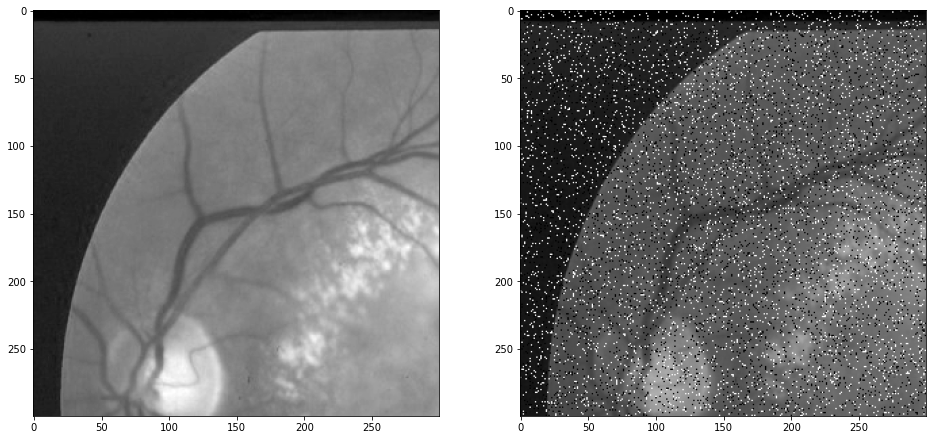

In [6]:
img = mpimg.imread('im0002.tif')[:300,:300,1]
img_noise=SalAndPimienta(img,0.05)
plt.figure(1,figsize=(16,16))
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.subplot(122)
plt.imshow(img_noise,cmap='gray')

In [ ]:
# Para cada tipo de imagen captada desde un mismo tipo de sensor s preseta un mismo tipo de ruido

In [7]:
def ruido(prob):
  img = mpimg.imread('im0002.tif')[:300,:300,1]
  img_noise=SalAndPimienta(img,prob)
  plt.figure(1,figsize=(16,16))
  plt.subplot(121)
  plt.imshow(img,cmap='gray')
  plt.subplot(122)
  plt.imshow(img_noise,cmap='gray')

  return

interact(ruido, prob=(0.001,0.02,0.0001))

interactive(children=(FloatSlider(value=0.0104, description='prob', max=0.02, min=0.001, step=0.0001), Output(…

<function __main__.ruido>

## 1. Filtro de media

In [ ]:
# Se encarga de sacar el promedio, es decir la imagen pierde resolucion(detalles)
# Se usa cuando nos interesa saber la forma , mas no los detalles

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


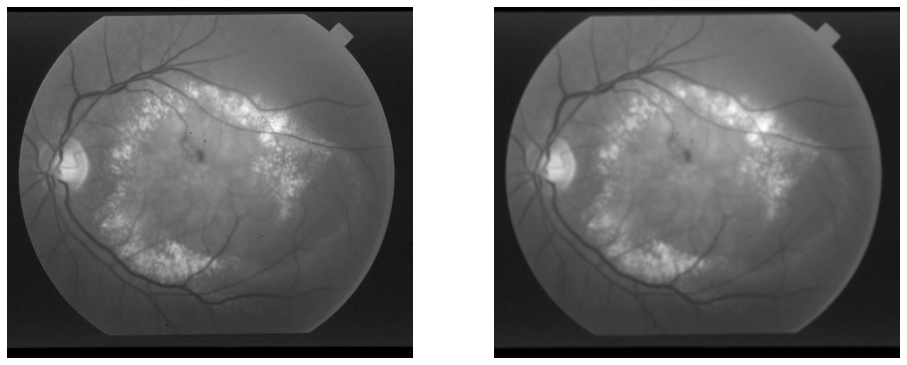

In [9]:
# Encuentra el valor promedio de todos los puntos cercanos
# Elimina imperfecciones
img = mpimg.imread('im0002.tif')[:,:,1]
# Crea el kernel
# Se divide entre 25 para que se respete el rango de 0-255
# Sino se divide entre 25 x ejemplo se puede tener un valor de 400 float y al normalizarse este tendra un valor de 255.
kernel = np.ones((5,5),float)/25 # todos tienen el mismo peso
print(kernel)
dst = cv2.filter2D(img,-1,kernel)

plt.figure(1,figsize=(16,20))
plt.subplot(121)
plt.axis('off')
plt.imshow(img,cmap='gray')
plt.subplot(122),plt.axis('off'),plt.imshow(dst,cmap='gray')
plt.show()

In [ ]:
# La imagen se ha suavizado con la aplicacion del filtro
# En caso halla un punto blanco que no se sabe como se ha generado , lo que hace el filtro de media
# es encontrar el valor promedio de todos los valores de los vecinos cercanos , entonces el punto blanco
# se convierte en un valor uniforme 

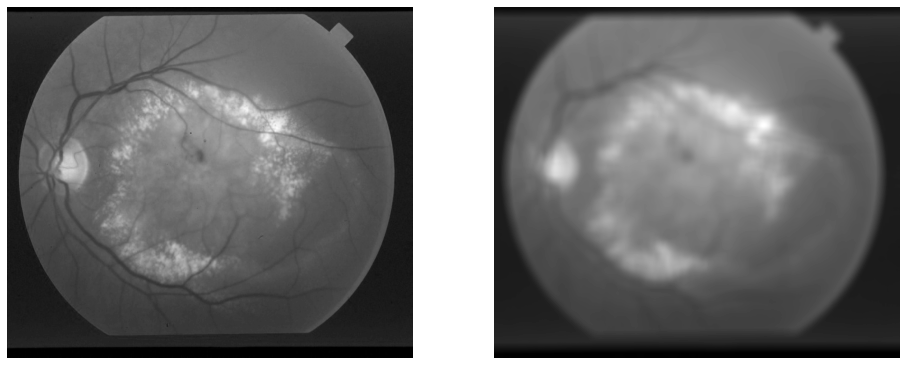

In [10]:
def FiltroMedia(size):
  img = mpimg.imread('im0002.tif')[:,:,1]
  kernel = np.ones((size,size),float)/(size*size)
  dst = cv2.filter2D(img,-1,kernel)

  plt.figure(1,figsize=(16,20))
  plt.subplot(121),plt.axis('off'),plt.imshow(img,cmap='gray')
  plt.subplot(122),plt.axis('off'),plt.imshow(dst,cmap='gray')
  return

interact(FiltroMedia, size=(3,20,1))

In [ ]:
# A un valor de kernel muy grande se pierden los detalles pero se mantiene la  forma del circulo
# y la parte oscura del circulo, además se puede ver que las venas pequeñas han desaparecido , mientras las venas grandes
# se han conservado

## 2. Filtro Gaussiano

In [ ]:
# Kernel que se usa es un kernel gaussiano
# El kernel gaussiano , en el medio tiene un pico a medida de q se va alejando del centro los valores cambian
# En imagenes sinteticas , es bien blanco en el medio y amedida que se va alejando se vuelve oscuro
# Funcion de gauss depende del x, y , desviacion estandar
# Filtro gaussiano : suaviza las imagenes

Kernel 3x3: 

[[1. 2. 1.]
 [2. 4. 2.]
 [1. 2. 1.]]


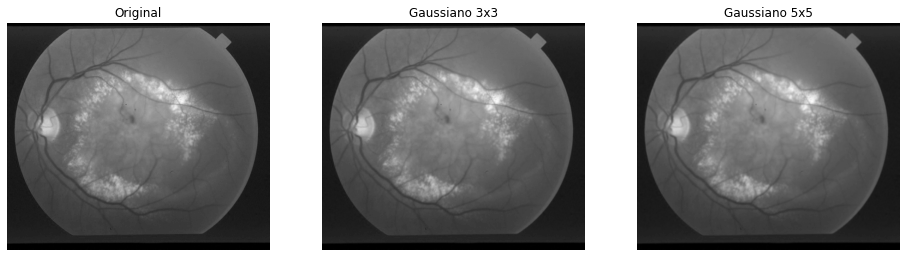

In [11]:
img = mpimg.imread('im0002.tif')[:,:,1]

# Definimos los kernel gaussianos en forma de lista
coef_1 = [1, 2, 1, 2, 4, 2, 1, 2, 1]
coef_2 = [0, 1, 2, 1, 0 ,1, 3, 5, 3, 1, 2, 5, 9, 5, 2, 1, 3, 5, 3, 1, 0, 1, 2, 1, 0]

# Definimos los kernel gaussianos en forma de matriz
# Filtro gaussiano prioriza el centro,y conforme se va alejando le da menor importancia. 
kernel_1 = np.array(coef_1,np.float32).reshape((3,3))/sum(coef_1)
kernel_2 = np.array(coef_2,np.float32).reshape((5,5))/sum(coef_2)

#Filtra la imagen utilizando el kernel anterior
dst_1 = cv2.filter2D(img,-1,kernel_1)
dst_2 = cv2.filter2D(img,-1,kernel_2)

plt.figure(1,figsize=(16,20))
plt.subplot(131),plt.axis('off'),plt.imshow(img,cmap='gray'),plt.title('Original')
plt.subplot(132),plt.axis('off'),plt.imshow(dst_1,cmap='gray'),plt.title('Gaussiano 3x3')
plt.subplot(133),plt.axis('off'),plt.imshow(dst_2,cmap='gray'),plt.title('Gaussiano 5x5')

print('Kernel 3x3: \n')
print(np.array(coef_1,np.float32).reshape((3,3)))

(<matplotlib.axes._subplots.AxesSubplot at 0x7f10fd736828>,
 <matplotlib.image.AxesImage at 0x7f10ff0a6128>)

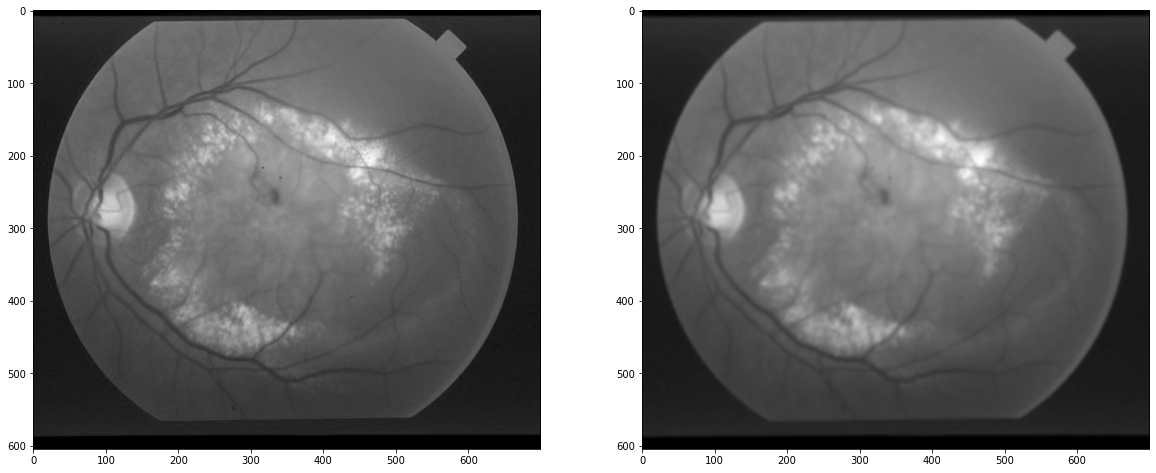

In [12]:
img = mpimg.imread('im0002.tif')[:,:,1]
kernel_size=10
kernel = np.ones((kernel_size, kernel_size), np.uint8)
gauss = cv2.getGaussianKernel(kernel_size, 1.8) # 1.8--> desviacion estandar
gauss = gauss * gauss.transpose(1, 0)
#print(gauss)
dst_1 = cv2.filter2D(img,-1,gauss)
plt.figure(1,figsize=(20,20))
plt.subplot(121),plt.imshow(img,cmap='gray')
plt.subplot(122),plt.imshow(dst_1,cmap='gray')

## 3. Ejercicio 1 ( 10 min - 1 punto )

Elaborar un script que use ***interact*** para ver la variacion del tamaña del kernel gaussiano. la variacion debe ser [3 , 20]. El resulta debe ser de la siguiente manera.

PD: El titulo debe variar con la variacion del tamaño del kernel

In [13]:
def FiltroGaussiano(kernel_size):
  img = mpimg.imread('im0002.tif')[:,:,1]

  kernel = np.ones((kernel_size, kernel_size), np.uint8)
  gauss = cv2.getGaussianKernel(kernel_size, 0)
  gauss = gauss * gauss.transpose(1, 0)
  
  dst_1 = cv2.filter2D(img,-1,gauss)
  plt.figure(1,figsize=(20,20))
  plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Imagen de entrada')
  plt.subplot(122),plt.imshow(dst_1,cmap='gray'),plt.title('Imagen filtrada con kernel '+str(kernel_size)+'x'+str(kernel_size))
  return

interact(FiltroGaussiano, kernel_size=(3,20,1))

interactive(children=(IntSlider(value=11, description='kernel_size', max=20, min=3), Output()), _dom_classes=(…

<function __main__.FiltroGaussiano>

In [ ]:
# Como se puede ver para un filtro de 20x20 en el filtro de Gauss aun se conservan los detalles de las 
# venas del medio , a diferencia del filtro de media en la que se desvanecen y solo queda la forma del objeto.

## 4. Accion de los filtros sobre el ruido

Text(0.5, 1.0, 'Imagen con filtro de media')

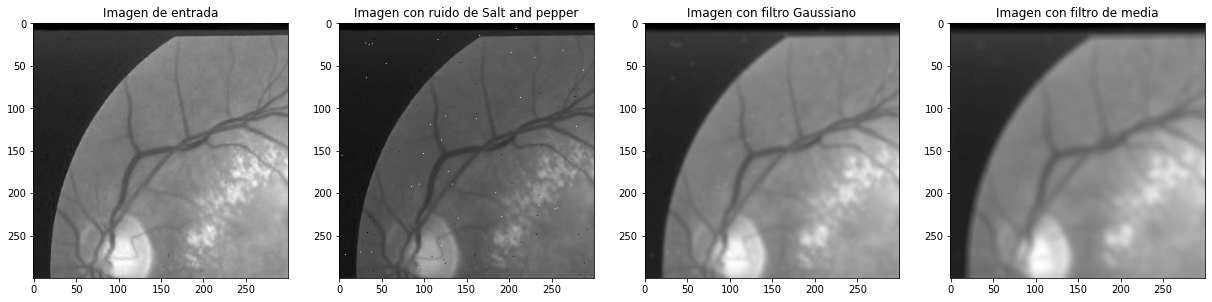

In [14]:
img = mpimg.imread('im0002.tif')[:300,:300,1]
img_noise=SalAndPimienta(img,0.0005)

kernel_size=10
kernel = np.ones((kernel_size, kernel_size), np.uint8)
gauss = cv2.getGaussianKernel(kernel_size, 0)
gauss = gauss * gauss.transpose(1, 0)
dst_1 = cv2.filter2D(img_noise,-1,gauss)

kernel = np.ones((kernel_size,kernel_size),float)/(kernel_size*kernel_size)
dst_2 = cv2.filter2D(img_noise,-1,kernel)

plt.figure(1,figsize=(21,7))

plt.subplot(1,4,1)
plt.imshow(img,cmap='gray')
plt.title('Imagen de entrada')

plt.subplot(1,4,2)
plt.imshow(img_noise,cmap='gray')
plt.title('Imagen con ruido de Salt and pepper')

plt.subplot(1,4,3)
plt.imshow(dst_1,cmap='gray')
plt.title('Imagen con filtro Gaussiano')

plt.subplot(1,4,4)
plt.imshow(dst_2,cmap='gray')
plt.title('Imagen con filtro de media')

In [ ]:
# Como se puede ver de la figura anterior , en el filtro gaussiano se pierden detalles pero algunos
# puntos del ruido de sal y pimienta han sido difuminados
# Al aplicar el filtro de media esas manchas ya no se notan, ya que han sido sustituidas por un valor uniforme.

In [ ]:
# Revisar caracteristicas invariantes
# SIFT
# Segmentacion de imagenes 
# Operaciones morfologicas en imagenes
# Manipulacion del histograma

In [ ]:
#######################################
# Segmentacion de Blood vessel
# Metodo de otsu
# Fuzzy-c means based clustering
# Operacion de top Hat
#######################################

In [ ]:
#######################################
# Pasos:
# 1.Preprocesamiento
# 2.Extraccion de caracteristicas
# Caracteristicas son elegidas por ensayo y error, estas caracteristicas se encuentran en los papers
# Momentos invariantes(para los asos sanguineos) : caracteristicas dependen del problema y los da el ser humano
# En el caso de los vasos sanguineos usan los momentos invariantes, ya qu estos analizan fragmentos pequeños de la imagen
# se puede caracterizar un vaso sanguineo sin saber cual es su posicion o orientacion
########################################

In [ ]:
# Homogenizar el fondo: usar una ventana gaussiana